In [196]:
# Core Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Splitting & Cross-Validation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_validate

# Preprocessing
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler

# Pipeline & Column Transformation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SKLearnPipeline
from imblearn.pipeline import Pipeline as ImbPipeline

# Machine Learning Algorithms (Base Models)
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Ensemble Models
from sklearn.ensemble import (
    BaggingClassifier, RandomForestClassifier,
    AdaBoostClassifier, AdaBoostRegressor,
    GradientBoostingClassifier,
    VotingClassifier, VotingRegressor,
    StackingClassifier, StackingRegressor
)
from xgboost import XGBClassifier

# Metrics & Scoring
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    fbeta_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    mean_squared_error, r2_score,
    make_scorer
)

# Imbalanced Learning (Sampling Techniques)
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

# Utility
from sklearn.utils import class_weight
from sklearn.base import clone

> # **Data Loading**

In [197]:
df = pd.read_csv('churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [199]:
df.shape

(10000, 14)

In [200]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [201]:
df.duplicated().sum()

0

In [202]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

> # **EDA**

In [203]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

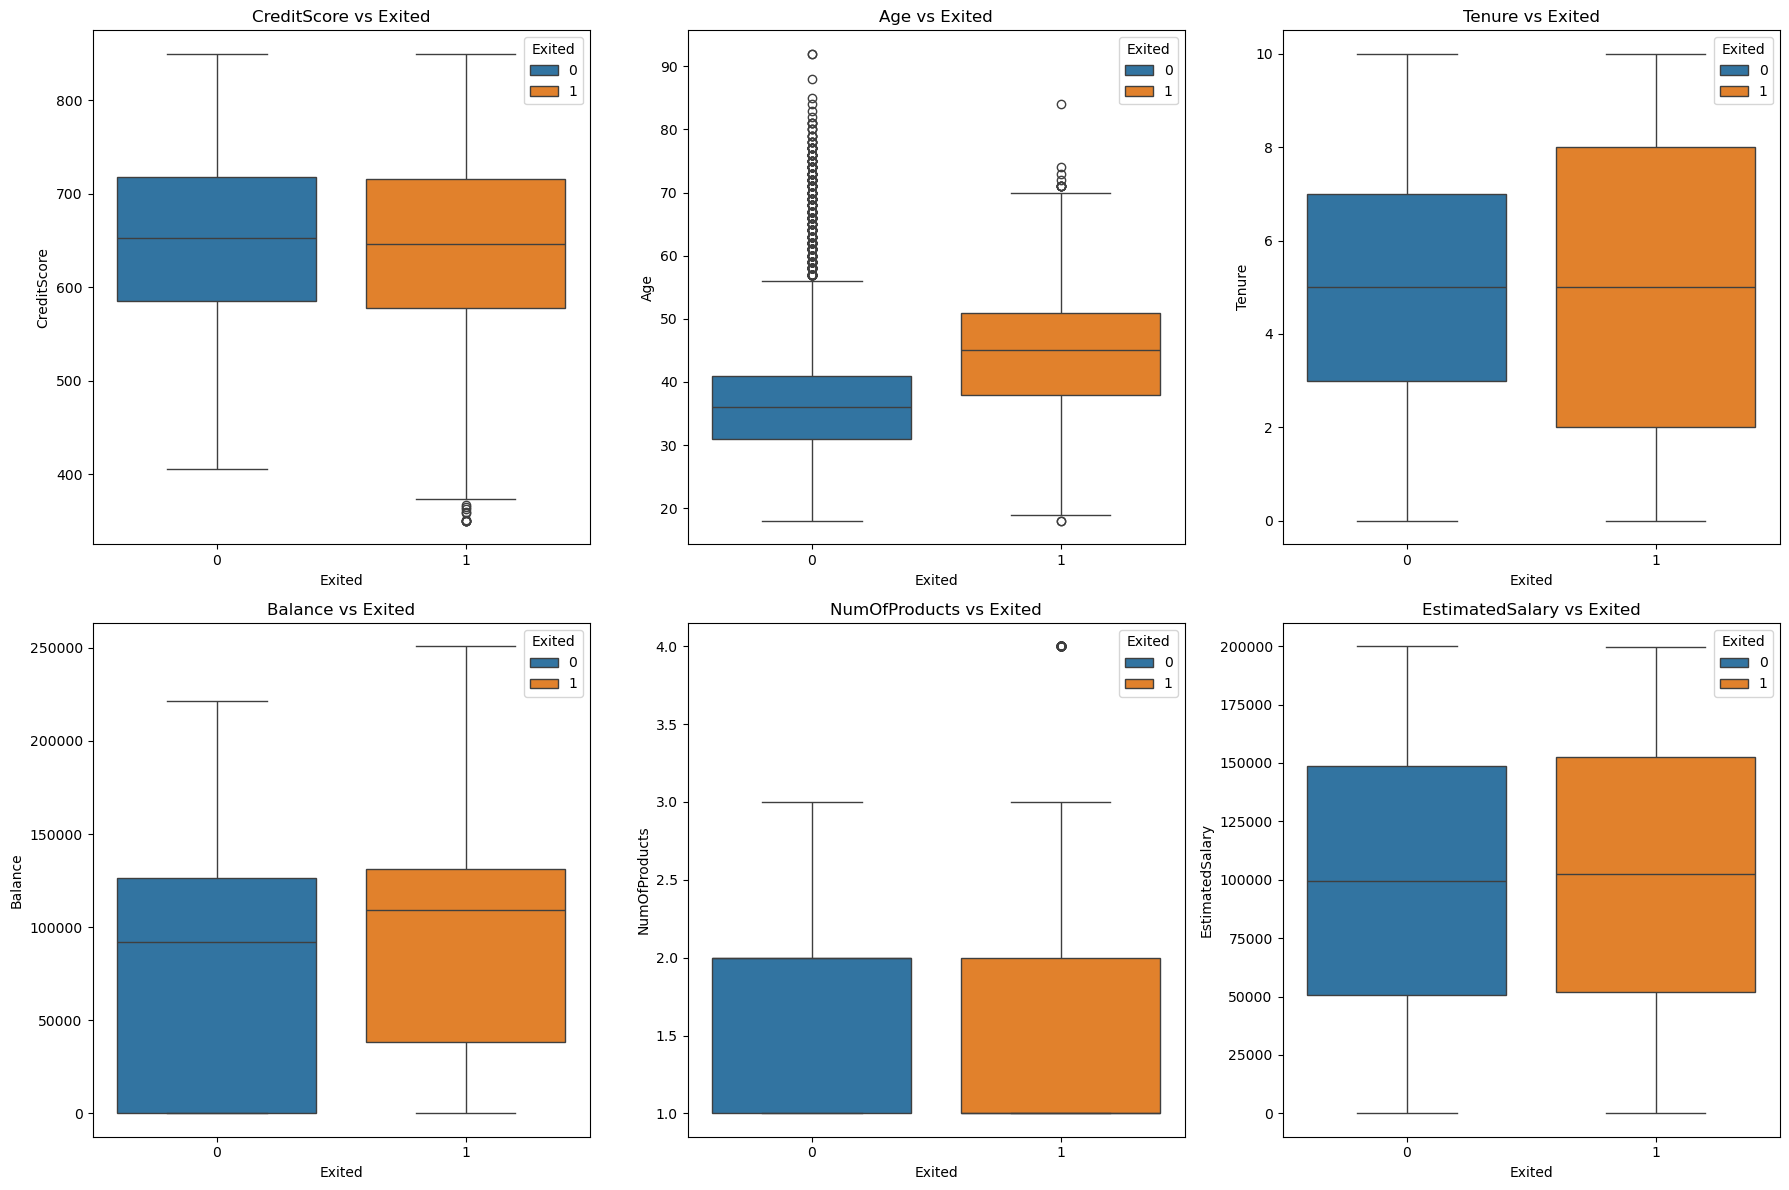

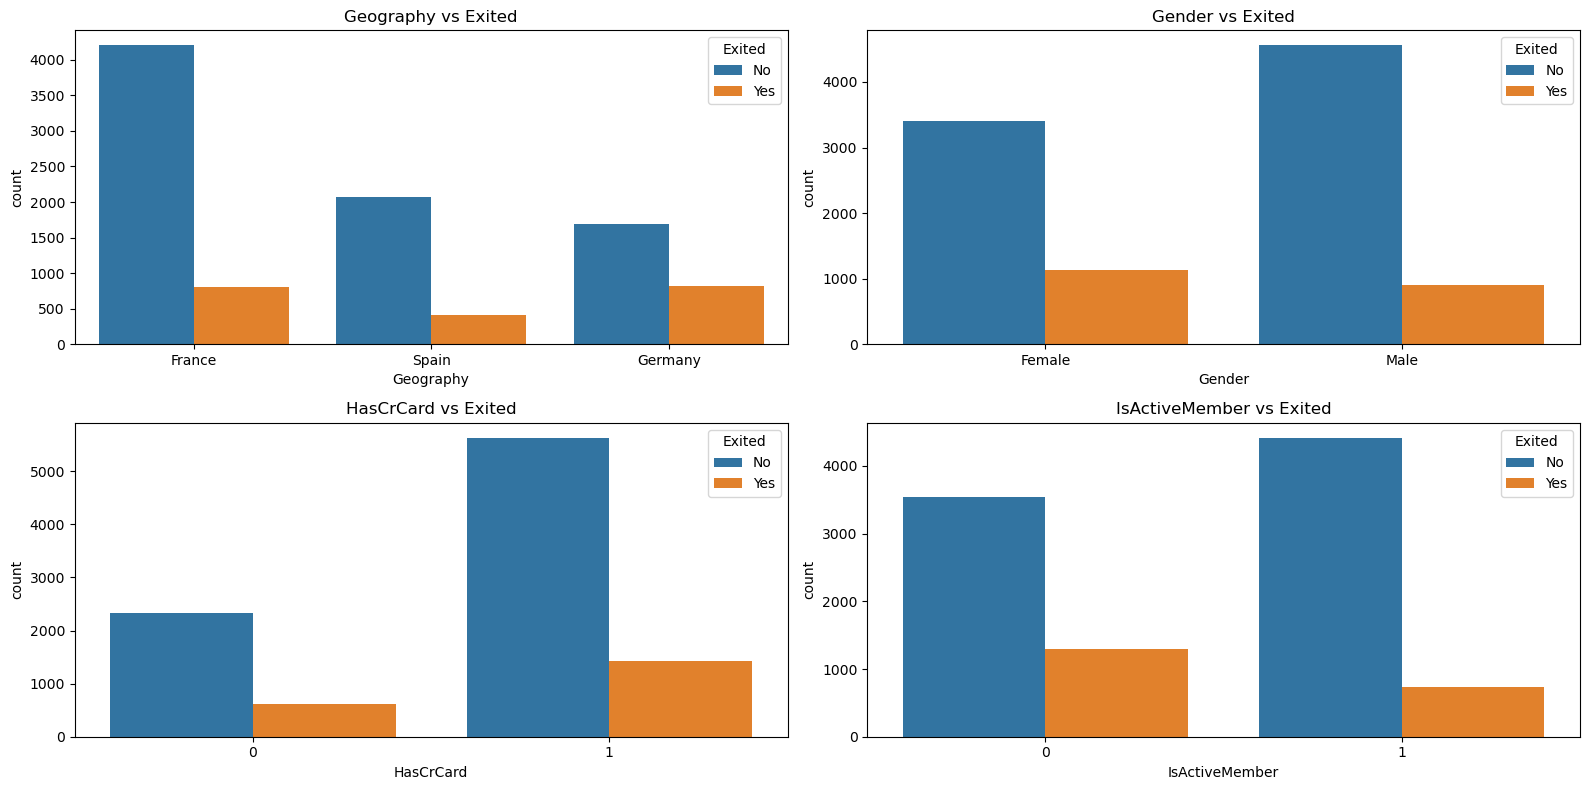

In [204]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

plt.figure(figsize=(18, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='Exited', y=col, hue='Exited')
    plt.title(f'{col} vs Exited')
plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 2, i)
    sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f'{col} vs Exited')
    plt.legend(title='Exited', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

- Age, Balance, Membership Status, dan Country Origin merupakan fitur penting yang berhubungan dengan churn.
- Customer dengan balance yang besar cenderung lebih banyak churn.
- Customer yang tidak aktif lebih banyak churn.

> # **Defining X & y**

In [205]:
X = df.drop(columns=['Exited', 'RowNumber', 'CustomerId', 'Surname'])

In [206]:
y = df['Exited']

> # **Data Splitting**

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

> # **Preprocessing**

In [208]:
transformers = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), ['CreditScore', 'Age', 'Balance']),
        ('standard', StandardScaler(), ['Tenure', 'NumOfProducts', 'EstimatedSalary']),
        ('binary', BinaryEncoder(drop_invariant=True), ['Geography']),
        ('onehot', OneHotEncoder(drop='first', sparse_output=False), ['Gender'])
    ],
    remainder='passthrough'
)

pipe = Pipeline([
    ('transformers', transformers)
])

pipe.fit(X_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance']),
                                                 ('standard', StandardScaler(),
                                                  ['Tenure', 'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['Geography']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender'])]))])

In [209]:
X_train_transformed = transformers.fit_transform(X_train)
X_test_transformed = transformers.transform(X_test)

In [210]:
feature_names_out = transformers.get_feature_names_out()
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=feature_names_out)
X_train_transformed_df

,robust__CreditScore,robust__Age,robust__Balance,standard__Tenure,standard__NumOfProducts,standard__EstimatedSalary,binary__Geography_0,binary__Geography_1,onehot__Gender_Male,remainder__HasCrCard,remainder__IsActiveMember
0,-0.902985,0.833333,-0.762398,0.353903,-0.902981,1.640990,0.0,1.0,0.0,0.0,0.0
1,0.537313,-0.083333,-0.022308,0.353903,0.813713,-1.555875,1.0,0.0,1.0,1.0,1.0
2,-1.253731,-0.666667,0.255372,-0.339090,-0.902981,1.103811,0.0,1.0,0.0,1.0,0.0
3,0.022388,0.000000,0.090943,0.353903,0.813713,-1.709357,0.0,1.0,1.0,1.0,0.0
4,-1.395522,-0.333333,-0.762398,0.007406,0.813713,-0.375574,0.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7995,0.694030,-0.083333,-0.762398,1.393393,-0.902981,-1.400204,0.0,1.0,0.0,1.0,0.0
7996,1.477612,0.333333,0.621792,-1.378581,0.813713,0.441249,1.0,0.0,1.0,0.0,1.0
7997,-0.380597,0.916667,0.517541,1.393393,-0.902981,-1.015075,1.0,0.0,1.0,0.0,1.0
7998,0.522388,-0.166667,0.519990,-1.032084,0.813713,-1.478872,0.0,1.0,0.0,1.0,1.0


In [211]:
X_test_transformed_df = pd.DataFrame(X_test_transformed, columns=feature_names_out)
X_test_transformed_df

,robust__CreditScore,robust__Age,robust__Balance,standard__Tenure,standard__NumOfProducts,standard__EstimatedSalary,binary__Geography_0,binary__Geography_1,onehot__Gender_Male,remainder__HasCrCard,remainder__IsActiveMember
0,-1.432836,0.250000,0.172404,0.353903,0.813713,-0.152547,1.0,0.0,0.0,1.0,0.0
1,0.455224,-1.083333,0.392829,0.700400,-0.902981,0.368185,1.0,0.0,0.0,1.0,1.0
2,0.082090,2.250000,-0.762398,0.353903,0.813713,-1.464856,1.0,1.0,1.0,0.0,1.0
3,-1.119403,1.666667,0.031275,-0.685587,-0.902981,-0.984700,1.0,0.0,0.0,1.0,0.0
4,0.805970,0.166667,0.634518,0.353903,-0.902981,-0.576134,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.022388,0.083333,-0.762398,1.393393,-0.902981,-0.171105,1.0,1.0,1.0,0.0,1.0
1996,-0.492537,0.083333,-0.762398,0.353903,0.813713,-1.082363,0.0,1.0,0.0,1.0,1.0
1997,-0.880597,0.333333,-0.762398,1.393393,0.813713,-1.499624,0.0,1.0,1.0,1.0,0.0
1998,0.783582,1.500000,0.155090,1.393393,4.247099,-0.106999,1.0,1.0,0.0,1.0,0.0


> # **Cross Validation**

In [212]:
tree = DecisionTreeClassifier(random_state=0)
rf = RandomForestClassifier(random_state=0)
adab = AdaBoostClassifier(random_state=0)
gradb = GradientBoostingClassifier(random_state=0)
xgb = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')

models = {
    'Decision Tree': tree,
    'Random Forest': rf,
    'Adaboost': adab,
    'Gradient Boost': gradb,
    'XGB': xgb
}

In [213]:
f2_scorer = make_scorer(fbeta_score, beta=2)

cv_f2 = []
cv_rec = []
cv_std = []

for model_name, model in models.items():
    pipe = Pipeline([
        ('preprocessing', transformers),
        ('modeling', model)
    ])
    
    # F2
    crossval_f2 = cross_val_score(
        estimator=pipe,
        X=X_train,
        y=y_train,
        cv=5,
        n_jobs=-1,
        scoring=f2_scorer,
    )
   
    # Recall
    crossval_rec = cross_val_score(
        estimator=pipe,
        X=X_train,
        y=y_train,
        cv=5,
        n_jobs=-1,
        scoring='recall'
    )
    
    cv_f2.append(crossval_f2.mean())
    cv_rec.append(crossval_rec.mean())
    cv_std.append(crossval_f2.std())

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

In [214]:
df_score = pd.DataFrame()
df_score['algo'] = models
df_score['std_score'] = cv_std
df_score['f2_score'] = cv_f2
df_score['recall_score'] = cv_rec
df_score

,algo,std_score,f2_score,recall_score
Decision Tree,DecisionTreeClassifier(random_state=0),0.024678,0.512823,0.517791
Random Forest,RandomForestClassifier(random_state=0),0.022057,0.502163,0.463190
Adaboost,AdaBoostClassifier(random_state=0),0.027809,0.486927,0.450307
Gradient Boost,GradientBoostingClassifier(random_state=0),0.014340,0.521886,0.482822
XGB,"XGBClassifier(base_score=None, booster=None, c...",0.013489,0.527224,0.497546


- Best Model: XGB
- Reason: Has the highest f2-score (~0.53) with the lowest standard deviation among all models.

In [215]:
neg, pos = np.bincount(y_train)
scale_pos_weight = neg / pos

imbalance_methods = {
    'None': None,
    'RandomOverSampler': RandomOverSampler(random_state=0),
    'RandomUnderSampler': RandomUnderSampler(random_state=0),
    'SMOTE': SMOTE(random_state=0),
    'SMOTETomek': SMOTETomek(random_state=0),
    'ClassWeight': 'class_weight'
}

results = []

for name, sampler in imbalance_methods.items():
    if name == 'ClassWeight':
        model = clone(xgb)
        model.set_params(scale_pos_weight=scale_pos_weight)
    else:
        model = clone(xgb)
        model.set_params(scale_pos_weight=1)
    
    X_train_bal = X_train_transformed_df.copy()
    y_train_bal = y_train.copy()
    
    if sampler is not None and sampler != 'class_weight':
        X_train_bal, y_train_bal = sampler.fit_resample(X_train_bal, y_train_bal)
    
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_transformed_df)
    
    f2 = fbeta_score(y_test, y_pred, beta=2)
    results.append({'method': name, 'f2_score': f2})

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anacond

In [216]:
df_imbalance = pd.DataFrame(results).sort_values('f2_score', ascending=False)
df_imbalance

,method,f2_score
2,RandomUnderSampler,0.665791
1,RandomOverSampler,0.602614
5,ClassWeight,0.599323
4,SMOTETomek,0.562847
3,SMOTE,0.539990
0,None,0.489785


- Best Approach: RandomUnderSampler
- Reason: Has the highest f2-score tertinggi (0.67) but note that it discards majority-class samples, which may remove useful patterns.

In [217]:
rus = RandomUnderSampler(random_state=0)
X_train_bal, y_train_bal = rus.fit_resample(X_train_transformed_df, y_train)

print("Shape X_train_bal:", X_train_bal.shape)
print("Shape y_train_bal:", y_train_bal.shape)
print("Class distribution after resampling:\n", pd.Series(y_train_bal).value_counts())

Shape X_train_bal: (3260, 11)
Shape y_train_bal: (3260,)
Class distribution after resampling:
 Exited
0    1630
1    1630
Name: count, dtype: int64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


> # **Hyperparameter Tuning**

In [218]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5]
}

xgb_tune = XGBClassifier(
    random_state=0, 
    use_label_encoder=False, 
    eval_metric='logloss'
)

In [219]:
random_search = RandomizedSearchCV(
    estimator=xgb_tune,
    param_distributions=param_dist,
    n_iter=30,
    scoring=f2_scorer,
    n_jobs=-1,
    cv=5,
    verbose=2,
    random_state=0
)

In [220]:
random_search.fit(X_train_bal, y_train_bal)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsampl

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.2, max_depth=4, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.7; tot

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=5, n_estimators=50, subsample=1.0;

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.3s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=5, n_estimators=200, subsample=0.7;

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; t

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_cons...
                                           num_parallel_tree=None, ...),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=0,
                   scoring=make_scorer(fbeta_score, response_method='predict', beta=2),
                   verbose=2)

In [221]:
random_search.best_params_

{'subsample': 0.7,
 'n_estimators': 200,
 'min_child_weight': 1,
 'max_depth': 6,
 'learning_rate': 0.01,
 'gamma': 0,
 'colsample_bytree': 1.0}

In [222]:
random_search.best_score_

0.7697301398265393

In [223]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

In [224]:
final_pipeline = Pipeline([
    ('transformers', transformers),
    ('model', random_search.best_estimator_)
])

final_pipeline

/opt/anaconda3/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transformers',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('robust', RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Balance']),
                                                 ('standard', StandardScaler(),
                                                  ['Tenure', 'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('binary',
                                                  BinaryEncoder(drop_invariant=True),
                                                  ['Geography']),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Gender'])...
                               feature_types=None, feature_weights=None,
                               gamma=0, grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None, min_child_weight=1,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None, ...))])

> ## **Predict to Test Set**

**Before Tuning**

In [225]:
xgb_default = XGBClassifier(random_state=0, use_label_encoder=False, eval_metric='logloss')
xgb_default.fit(X_train_bal, y_train_bal)
y_pred_default = xgb_default.predict(X_test_transformed_df)

print(classification_report(y_test, y_pred))
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1593
           1       0.56      0.61      0.58       407

    accuracy                           0.82      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.83      0.82      0.83      2000

Recall: 0.6093
Precision: 0.5624


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [16:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


**After Tuning**

In [226]:
xgb_best = random_search.best_estimator_
y_pred_best = xgb_best.predict(X_test_transformed_df)

print(classification_report(y_test, y_pred_best))
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")


              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1593
           1       0.50      0.75      0.60       407

    accuracy                           0.80      2000
   macro avg       0.71      0.78      0.73      2000
weighted avg       0.84      0.80      0.81      2000

Recall: 0.7494
Precision: 0.4984


> ## **Confusion Matrix**

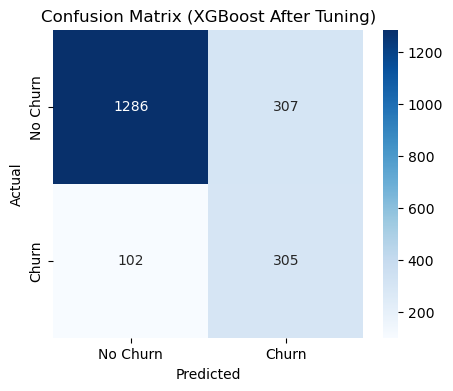

In [227]:
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (XGBoost After Tuning)')
plt.show()

- True Negative (TN): 1286 Customers who genuinely didn't churn and were predicted not to churn.
- False Positive (FP): 307 Customers who didn't churn but were predicted to churn (potential unnecessary promotion).
- False Negative (FN): 102 Customers who actually churned but were predicted not to churn.
- True Positive (TP): 305 Customers who genuinely churned and were predicted to churn.

Known Costs:
- False Positive (FP): $100 per case
- False Negative (FN): $500 per case

Budget Allocation Calculation:
(307 × $100) + (102 × $500) = $81,700

> ## **Feature Importance**

In [228]:
X_test_transformed_df

,robust__CreditScore,robust__Age,robust__Balance,standard__Tenure,standard__NumOfProducts,standard__EstimatedSalary,binary__Geography_0,binary__Geography_1,onehot__Gender_Male,remainder__HasCrCard,remainder__IsActiveMember
0,-1.432836,0.250000,0.172404,0.353903,0.813713,-0.152547,1.0,0.0,0.0,1.0,0.0
1,0.455224,-1.083333,0.392829,0.700400,-0.902981,0.368185,1.0,0.0,0.0,1.0,1.0
2,0.082090,2.250000,-0.762398,0.353903,0.813713,-1.464856,1.0,1.0,1.0,0.0,1.0
3,-1.119403,1.666667,0.031275,-0.685587,-0.902981,-0.984700,1.0,0.0,0.0,1.0,0.0
4,0.805970,0.166667,0.634518,0.353903,-0.902981,-0.576134,0.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0.022388,0.083333,-0.762398,1.393393,-0.902981,-0.171105,1.0,1.0,1.0,0.0,1.0
1996,-0.492537,0.083333,-0.762398,0.353903,0.813713,-1.082363,0.0,1.0,0.0,1.0,1.0
1997,-0.880597,0.333333,-0.762398,1.393393,0.813713,-1.499624,0.0,1.0,1.0,1.0,0.0
1998,0.783582,1.500000,0.155090,1.393393,4.247099,-0.106999,1.0,1.0,0.0,1.0,0.0


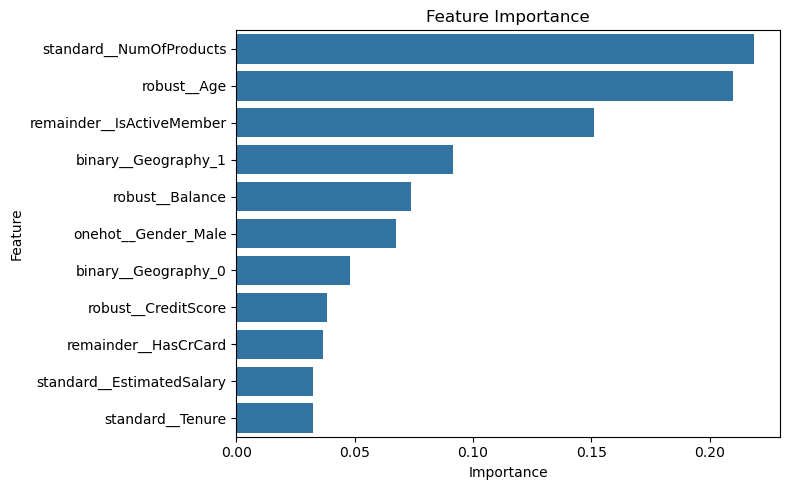

In [229]:
importances = xgb_best.feature_importances_

feature_names = feature_names_out

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [230]:
feat_imp = feat_imp.sort_values('Importance', ascending=False)
feat_imp

,Feature,Importance
4,standard__NumOfProducts,0.218735
1,robust__Age,0.209619
10,remainder__IsActiveMember,0.151117
7,binary__Geography_1,0.091557
2,robust__Balance,0.073976
8,onehot__Gender_Male,0.067372
6,binary__Geography_0,0.048001
0,robust__CreditScore,0.038347
9,remainder__HasCrCard,0.036503
5,standard__EstimatedSalary,0.032419


Top 3 Features Predicting Customer Churn
1. Number of Product Used, Customers using more products are less likely to churn.
2. Age, Older customers show higher churn risk.
3. Membership Status, Active members are significantly less likely to churn.